In [18]:
!pip install shap

In [20]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

In [21]:
import io

In [22]:
from google.colab import files
uploaded = files.upload()

Saving vnet.csv to vnet.csv


In [23]:
df= pd.read_csv(io.BytesIO(uploaded['vnet.csv']))
print(df)

           Date       Open       High        Low      Close  Adj Close  \
0     4/25/2011  19.400000  19.500000  17.320000  17.750000  17.750000   
1     4/26/2011  17.700001  18.709999  17.400000  17.559999  17.559999   
2     4/27/2011  17.840000  17.840000  15.800000  16.250000  16.250000   
3     4/28/2011  16.110001  16.780001  15.700000  16.030001  16.030001   
4     4/29/2011  15.950000  16.420000  15.300000  15.510000  15.510000   
...         ...        ...        ...        ...        ...        ...   
2306  6/23/2020  22.420000  24.580000  21.200001  23.750000  23.750000   
2307  6/24/2020  23.190001  23.240000  21.809999  22.209999  22.209999   
2308  6/25/2020  22.500000  24.480000  21.930000  24.270000  24.270000   
2309  6/26/2020  24.350000  24.680000  23.180000  24.559999  24.559999   
2310  6/29/2020  24.440001  25.230000  24.250000  24.790001  24.790001   

        Average  
0     18.344000  
1     17.786000  
2     16.796000  
3     16.130001  
4     15.738000  
...

In [24]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Adj Close,Average
0,19.400000,19.500000,17.32,17.750000,17.750000,18.344000
1,17.700001,18.709999,17.40,17.559999,17.559999,17.786000
2,17.840000,17.840000,15.80,16.250000,16.250000,16.796000
3,16.110001,16.780001,15.70,16.030001,16.030001,16.130001
4,15.950000,16.420000,15.30,15.510000,15.510000,15.738000


In [25]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

x = df.drop("Average", axis = 1)
y = df.Close
y = y.astype('int')

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
y_pred = clf.predict(x_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        43
           8       1.00      1.00      1.00        33
           9       1.00      1.00      1.00        38
          10       1.00      1.00      1.00        27
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        11
          13       1.00      0.94      0.97        16
          14       0.89      1.00      0.94         8
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         9
          18       1.00      1.00      1.00        17
          19       1.00      1.00      1.00        20
          20       1.00      1.00      1.00        20
          21       1.00    

In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(random_state=0)

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  3  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  1  0  8  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0 37  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0 22  9  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 34  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 20  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  6  0  1  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0 10  0  0  4  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  4  0  0  1  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  0  0  0  0  0  0  1  1  2  0  0  2  0  0  1  

0.31412103746397696

In [32]:
clearer = shap.Explainer(clf)
shap_values = clearer.shap_values(x_test)

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


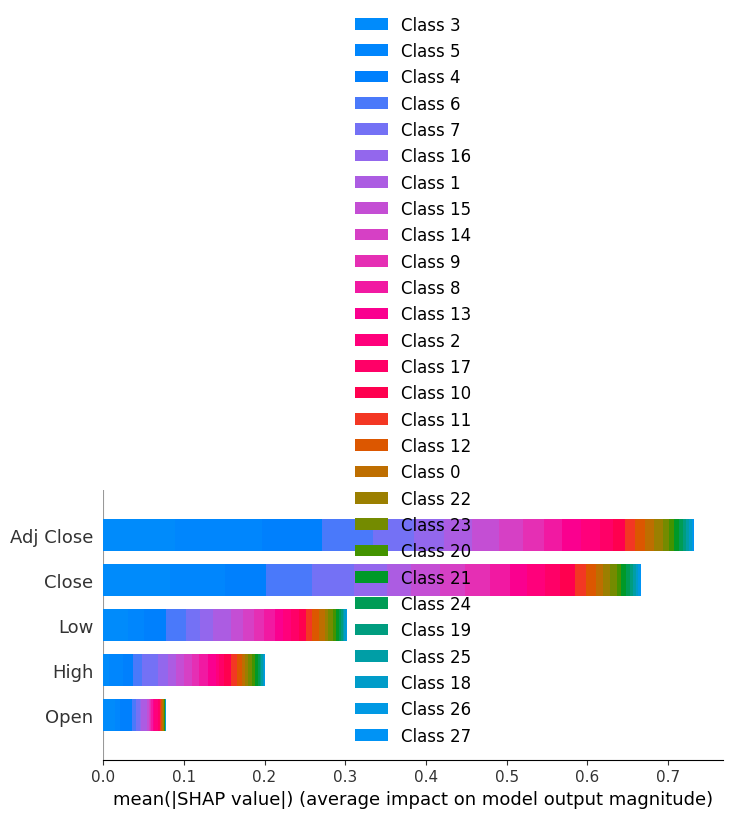

In [33]:
shap.summary_plot(shap_values, x_test)